In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
county_data = pd.read_csv('data/better_cpuc_compiled.csv')

In [3]:
county_data.drop(columns='Unnamed: 0', inplace=True)

county_data.set_index('County', inplace=True)

# from statsquest youtube

In [4]:
scaled_data = preprocessing.scale(county_data.T)

C:\Users\audre\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [5]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

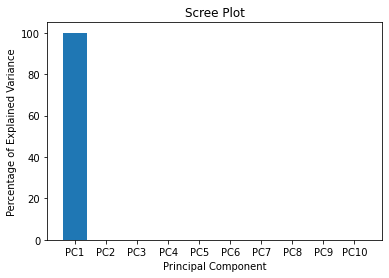

In [6]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [7]:
county_data.columns

Index(['Population', 'Mean Income', 'CES Score Median',
       'TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm', 'Budget',
       'Total Claims', 'Total Programs', 'IRR', 'Tax Revenue (2016-2018)'],
      dtype='object')

In [8]:
county_data.reset_index(inplace=True)

# Covariance matrix
to determine which variables to squish into one PC

In [29]:
covariance_matrix = county_data.drop(
    columns=['County','Budget', 'TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm', 'Total Claims', 'Total Programs']).cov()

In [30]:
var_list = list(covariance_matrix.index)

In [31]:
for var in var_list:
    for car in var_list:
        if covariance_matrix.loc[var,car] >= 0.5:
            print(covariance_matrix.loc[var,car])
            print(var+' and '+car+'\n')

2159501742668.8196
Population and Population

276970580.0323653
Population and Mean Income

3395563.123796662
Population and CES Score Median

4401735720318215.0
Population and Tax Revenue (2016-2018)

276970580.0323653
Mean Income and Population

70614891.51633392
Mean Income and Mean Income

1354728779917.6887
Mean Income and Tax Revenue (2016-2018)

3395563.123796662
CES Score Median and Population

103.65088974540357
CES Score Median and CES Score Median

6510483056.857431
CES Score Median and Tax Revenue (2016-2018)

4401735720318215.0
Tax Revenue (2016-2018) and Population

1354728779917.6887
Tax Revenue (2016-2018) and Mean Income

6510483056.857431
Tax Revenue (2016-2018) and CES Score Median

1.0169227478377265e+19
Tax Revenue (2016-2018) and Tax Revenue (2016-2018)



# WHY ARE THESE COVARIANCES SO HIGH?????? SEEMS LIKE EVERYTHING IS EXTREMELY VARIED BUT MOVES TOGETHER? OR I'VE GOTTA LEARN MORE ABOUT COVARIANCE
ya turns out we were looking at correlation before, not covariance, so that's why theses numbers seem so high. Still kinda crazy how high they are though

In [32]:
correlation_matrix = county_data.drop(
    columns=['County','Budget', 'TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm','Total Claims', 'Total Programs']).corr()

In [43]:
for var in var_list:
    for car in var_list:
        if correlation_matrix.loc[var,car] >= 0.5:
            print(correlation_matrix.loc[var,car])
            print(var+' and '+car+'\n')

1.0
Population and Population

0.9392975800255418
Population and Tax Revenue (2016-2018)

1.0
Mean Income and Mean Income

1.0
CES Score Median and CES Score Median

1.0
IRR and IRR

0.9392975800255418
Tax Revenue (2016-2018) and Population

1.0
Tax Revenue (2016-2018) and Tax Revenue (2016-2018)



from the above its clear that tax revenue and population are extremely correlated....might be worth it to just drop one because they are almost the same variable with 0.94 correlation..... if I drop population do IRR and tax revenue become more/less correlated or is there no change?

In [36]:
correlation_matrix_nop = county_data.drop(
    columns=['County','Budget', 'TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm','Total Claims', 'Total Programs', 'Population']).corr()

In [39]:
car_list = list(correlation_matrix_nop.index)
for var in car_list:
    for car in car_list:
        if correlation_matrix_nop.loc[var,car] >= 0.5:
            print(correlation_matrix_nop.loc[var,car])
            print(var+' and '+car+'\n')

1.0
Mean Income and Mean Income

1.0
CES Score Median and CES Score Median

1.0
IRR and IRR

1.0
Tax Revenue (2016-2018) and Tax Revenue (2016-2018)



In [44]:
correlation_matrix['IRR']

Population                -0.568694
Mean Income               -0.088598
CES Score Median          -0.126472
IRR                        1.000000
Tax Revenue (2016-2018)   -0.453974
Name: IRR, dtype: float64

In [45]:
correlation_matrix_nop['IRR']

Mean Income               -0.088598
CES Score Median          -0.126472
IRR                        1.000000
Tax Revenue (2016-2018)   -0.453974
Name: IRR, dtype: float64

alright so correlation does not change if other variables are no longer present.....should talk to team to decide if the best way to approach this is with PCA or to drop population/tax revenue before we run more regressions

# from the following article:
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [73]:
from sklearn.preprocessing import StandardScaler

features = ['Population', 'IRR', 'Tax Revenue (2016-2018)']

# features = ['Population', 'Mean Income', 'CES Score Median',
#        'Total Claims', 'Total Programs', 'IRR', 'Tax Revenue (2016-2018)']


# Separating out the features
x = county_data.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [74]:
from sklearn.decomposition import PCA

n=3
pca = PCA(n_components=n)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC' + str(x) for x in range(1, n+1)])

In [75]:
principalDf.head()

,PC1,PC2,PC3
0,1.449287,-0.965504,0.009790
1,-1.458132,1.349377,-0.172053
2,-0.780753,0.177350,-0.016432
3,-0.348038,-0.272243,0.030548
4,-0.802072,0.236660,-0.021523


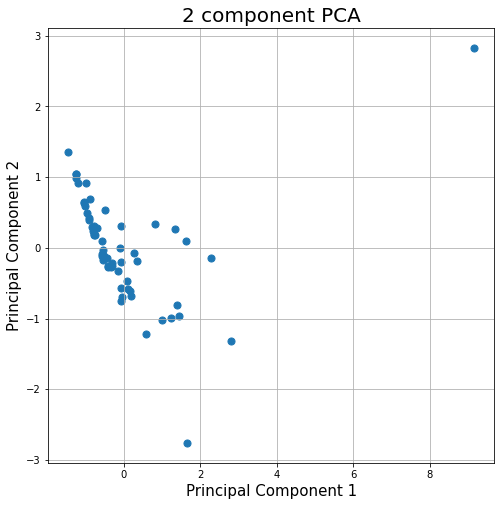

In [76]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

counties = list(county_data['County'])

ax.scatter(principalDf.loc[:, 'PC1']
            , principalDf.loc[:, 'PC2']
            , s = 50)
    

ax.grid()

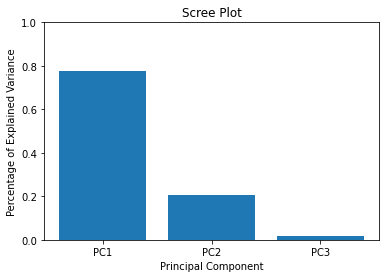

In [77]:
per_var = pca.explained_variance_ratio_
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylim([0,1])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

From the above bar graph, it is clear that PC1 explains the ?most variance? compared to the other principal components, thus it is valid to use as a proxy for population, tax revenue, and IRR

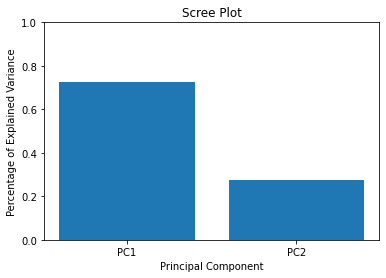

In [81]:
features = ['IRR', 'Tax Revenue (2016-2018)']

# features = ['Population', 'Mean Income', 'CES Score Median',
#        'Total Claims', 'Total Programs', 'IRR', 'Tax Revenue (2016-2018)']


# Separating out the features
y = county_data.loc[:, features].values

# Standardizing the features
y = StandardScaler().fit_transform(y)

n=2
pca = PCA(n_components=n)

principalComponents = pca.fit_transform(y)

principalDf_nopop = pd.DataFrame(data = principalComponents
             , columns = ['PC' + str(y) for x in range(1, n+1)])

per_var_nopop = pca.explained_variance_ratio_
labels = ['PC' + str(x) for x in range(1, len(per_var_nopop)+1)]
 
plt.bar(x=range(1,len(per_var_nopop)+1), height=per_var_nopop, tick_label=labels)
plt.ylim([0,1])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [82]:
per_var

array([0.7775235 , 0.20550555, 0.01697095])

In [83]:
per_var_nopop

array([0.72698712, 0.27301288])

so with no population, pc1 of tax revenue and irr still explains a good amount of variance.....not really sure what the significance of this is but will investigate